In [1]:
%pylab inline

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import sqlite3
import pandas as pd

import utilities as util

Populating the interactive namespace from numpy and matplotlib


# Load data

In [2]:
filename = '../data/mountain_project_gunks.sqlite'
conn = sqlite3.connect(filename)

# Climber profiles
df_users = pd.read_sql('SELECT * FROM users', conn)

# Route data
df_items = pd.read_sql("""
SELECT items.*, pro.pro_type
FROM items JOIN pro 
ON items.pro_id = pro.id
""", conn)

# Ratings of each route
df_ratings = pd.read_sql('SELECT * FROM ratings', conn)

In [3]:
display(df_users.sample(3).style.format(util.make_clickable, subset=['user_url']))
display(df_items.drop('description', axis=1).sample(3).style.format(util.make_clickable, subset=['route_url']))
display(df_ratings.sample(3))

,uid,name,user_url,profile
1276,1276,jdlittlewood,https://www.mountainproject.com/user/108317918/jdlittlewood,Male
119,119,Joey Caffrey,https://www.mountainproject.com/user/200357691/joey-caffrey,None
2163,2163,Chris O'Connor,https://www.mountainproject.com/user/14004/chris-oconnor,"boulder, co 32 years old Male"


,iid,route_name,route_url,difficulty,pro_id,length,pitches,nratings,monthly_views,total_views,pro_type
359,359,The Winter,https://www.mountainproject.com/route/106238729/the-winter,5.10+,1,175,2,72,41,5225,Trad
267,267,Silhouette,https://www.mountainproject.com/route/106612308/silhouette,5.7+,1,0,2,40,17,1949,Trad
238,238,Blunderbus,https://www.mountainproject.com/route/108242249/blunderbus,5.9+,1,90,1,5,9,613,Trad


,uid,iid,rating
16047,1752,196,4
21936,1569,277,4
29712,94,446,2


# Plot distributions

In [4]:
df_users.shape, df_items.shape, df_ratings.shape

((2432, 4), (470, 12), (31431, 3))

In [5]:
df_users['name'].unique().shape, df_items['route_name'].unique().shape

((2427,), (470,))

2432.0


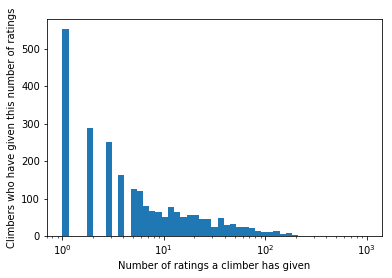

In [6]:
grouped = df_ratings.groupby('uid')
ratings_per_climber = grouped.size().values

fig, ax = plt.subplots()
counts, bins, _ = ax.hist(ratings_per_climber, bins=np.logspace(0, 3, 50))
ax.set_xscale('log')
ax.set_xlabel('Number of ratings a climber has given')
ax.set_ylabel('Climbers who have given this number of ratings')
print np.sum(counts)

469.0

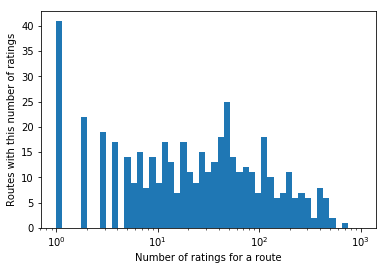

In [7]:
grouped = df_ratings.groupby('iid')
ratings_per_route = grouped.size().values

fig, ax = plt.subplots()
counts, _, _ = ax.hist(ratings_per_route, bins=np.logspace(0, 3, 50))
ax.set_xscale('log')
ax.set_xlabel('Number of ratings for a route')
ax.set_ylabel('Routes with this number of ratings')
np.sum(counts)

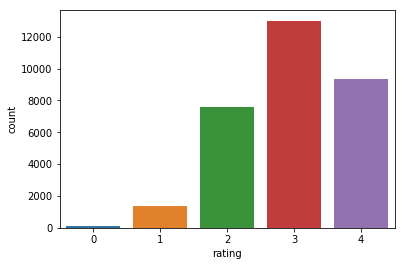

In [8]:
sns.countplot(x='rating', data=df_ratings)